### Data
ene.024 Electricity Production, Sources, and Access <br>
https://resourcewatch.carto.com/u/wri-rw/dataset/ene_024_energy_production_sources_access <br>

In [2]:
import numpy as np
import vega
import json
from vega import Vega

### Resource Watch specification
API ID: 5952e6c3-7aca-4604-b6ed-8f6ae4665a12 <br>
https://resourcewatch.org/embed/widget/5952e6c3-7aca-4604-b6ed-8f6ae4665a12

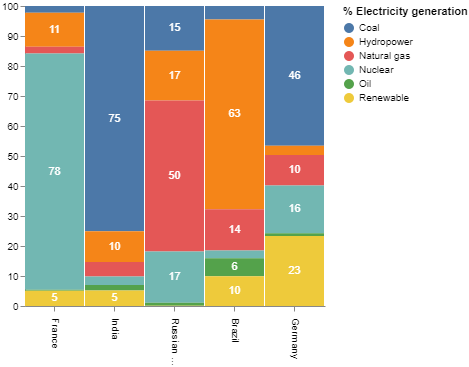

In [3]:
specV3=json.loads("""
{
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "data": [
    {
      "name": "table",
      "url": "https://api.resourcewatch.org/v1/query/0f6c0ded-4f88-4902-b846-7bf57a9c3843?sql=SELECT field_1 as x,electricity_production_kwh_billions, share_coal,share_naturalgas, share_oil, share_hydropower,share_renewable, share_nuclear, access_to_electricity FROM ene_024_energy_production_sources_access WHERE share_coal IS NOT NULL AND field_1 IN ('India','Russian Federation','Brazil','Germany','France')",
      "format": {
        "type": "json",
        "property": "data"
      },
      "transform": [
        {
          "type": "fold",
          "as": [
            "c",
            "y"
          ],
          "fields": [
            "share_coal",
            "share_hydropower",
            "share_naturalgas",
            "share_nuclear",
            "share_oil",
            "share_renewable"
          ]
        },
        {
          "type": "formula",
          "as": "c",
          "expr": "replace(upper(slice(datum.c,6,7))+slice(datum.c,7),/_/g,' ')"
        },
        {
          "type": "formula",
          "as": "c",
          "expr": "if(datum.c=='Naturalgas','Natural gas',datum.c)"
        },
        {
          "type": "stack",
          "field": "y",
          "groupby": [
            "x"
          ],
          "offset": "normalize",
          "sort": {
            "field": "c",
            "order": "descending"
          }
        },
        {
          "type": "formula",
          "as": "y0",
          "expr": "datum.y0*100"
        },
        {
          "type": "formula",
          "as": "y1",
          "expr": "datum.y1*100"
        },
        {
          "type": "formula",
          "as": "y_text",
          "expr": "if(datum.y < 5, '', round(datum.y))"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "band",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": false,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": {
        "data": "table",
        "field": "c"
      }
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 6,
      "encode": {
        "labels": {
          "update": {
            "limit": {
              "value": 50
            },
            "angle": {
              "value": 90
            },
            "align": {
              "value": "left"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "orient": "left",
      "scale": "y",
      "zindex": 0,
      "labelOverlap": "parity"
    }
  ],
  "marks": [
    {
      "name": "bars",
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "width": {
            "scale": "x",
            "band": 1,
            "offset": -1
          },
          "y": {
            "scale": "y",
            "field": "y0"
          },
          "y2": {
            "scale": "y",
            "field": "y1"
          },
          "fill": {
            "scale": "color",
            "field": "c"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          }
        }
      }
    },
    {
      "type": "text",
      "from": {
        "data": "bars"
      },
      "encode": {
        "enter": {
          "x": {
            "field": "x",
            "offset": {
              "field": "width",
              "mult": 0.5
            }
          },
          "y": {
            "field": "y",
            "offset": {
              "field": "height",
              "mult": 0.5
            }
          },
          "fill": {
            "value": "white"
          },
          "align": {
            "value": "center"
          },
          "baseline": {
            "value": "middle"
          },
          "text": {
            "field": "datum.y_text"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "% Electricity generation",
      "fill": "color",
      "orient": "right"
    }
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "y",
            "property": "percentage",
            "type": "number",
            "format": ".2"
          },
          {
            "column": "c",
            "property": "type",
            "type": "string"
          },
          {
            "column": "x",
            "property": "Country",
            "type": "string"
          }
        ]
      }
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
vega4view['width']=300
vega4view['height']=300
Vega(vega4view)

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

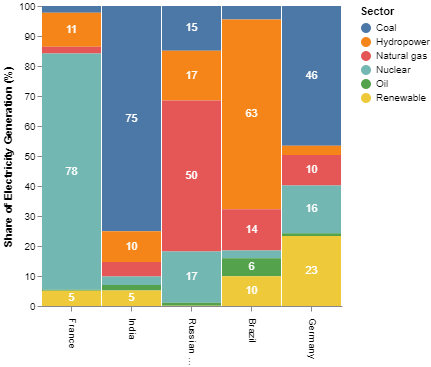

In [7]:
specV3=json.loads("""
{
  "width":300,
  "height":300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT field_1 as x,electricity_production_kwh_billions, share_coal,share_naturalgas, share_oil, share_hydropower,share_renewable, share_nuclear, access_to_electricity FROM ene_024_energy_production_sources_access WHERE share_coal IS NOT NULL AND field_1 IN ('India','Russian Federation','Brazil','Germany','France')",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "fold",
          "as": [
            "c",
            "y"
          ],
          "fields": [
            "share_coal",
            "share_hydropower",
            "share_naturalgas",
            "share_nuclear",
            "share_oil",
            "share_renewable"
          ]
        },
        {
          "type": "formula",
          "as": "c",
          "expr": "replace(upper(slice(datum.c,6,7))+slice(datum.c,7),/_/g,' ')"
        },
        {
          "type": "formula",
          "as": "c",
          "expr": "if(datum.c=='Naturalgas','Natural gas',datum.c)"
        },
        {
          "type": "stack",
          "field": "y",
          "groupby": [
            "x"
          ],
          "offset": "normalize",
          "sort": {
            "field": "c",
            "order": "descending"
          }
        },
        {
          "type": "formula",
          "as": "y0",
          "expr": "datum.y0*100"
        },
        {
          "type": "formula",
          "as": "y1",
          "expr": "datum.y1*100"
        },
        {
          "type": "formula",
          "as": "y_text",
          "expr": "if(datum.y < 5, '', round(datum.y))"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "band",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": false,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": {
        "data": "table",
        "field": "c"
      }
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 6,
      "encode": {
        "labels": {
          "update": {
            "limit": {
              "value": 50
            },
            "angle": {
              "value": 90
            },
            "align": {
              "value": "left"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "orient": "left",
      "scale": "y",
      "zindex": 0,
      "labelOverlap": "parity",
      "title": "Share of Electricity Generation (%)"
    }
  ],
  "marks": [
    {
      "name": "bars",
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "width": {
            "scale": "x",
            "band": 1,
            "offset": -1
          },
          "y": {
            "scale": "y",
            "field": "y0"
          },
          "y2": {
            "scale": "y",
            "field": "y1"
          },
          "fill": {
            "scale": "color",
            "field": "c"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          },
          "tooltip": {
            "signal": "{'Share':round(datum.y)+'%','Sector':datum.c,'Country':datum.x}"
          }
        }
      }
    },
    {
      "type": "text",
      "from": {
        "data": "bars"
      },
      "encode": {
        "enter": {
          "x": {
            "field": "x",
            "offset": {
              "field": "width",
              "mult": 0.5
            }
          },
          "y": {
            "field": "y",
            "offset": {
              "field": "height",
              "mult": 0.5
            }
          },
          "fill": {
            "value": "white"
          },
          "align": {
            "value": "center"
          },
          "baseline": {
            "value": "middle"
          },
          "text": {
            "field": "datum.y_text"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "Sector",
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
Vega(vega4view)